
---



---


**TMNIST | Neural Network Type Classification**

**Shreya Jaiswal** 


---


---

<h3 style="background-color:#E8999B"><b>ABSTRACT</b></h3>

---




<h5 style="background-color:#FCF6D5"><b>ABOUT THE DATA</b></h5>




> The **MNIST database (Modified National Institute of Standards and Technology database)** is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

> It is an extremely good database for people who want to try machine learning techniques and pattern recognition methods on real-world data while spending minimal time and effort on data preprocessing and formatting. Its simplicity and ease of use are what make this dataset so widely used and deeply understood. 


>dataset origin : https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy/input



---



---



---
 <h5 style="background-color:#FCF6D5"><b>IMPORT LIBRARIES</b></h5>


---



---



In [1]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



<hr>



---
<h5 style="background-color:#FCF6D5"><b>READING DATA</b></h5>

<hr>



---





In [2]:
# Reading Data
df_tmnist = pd.read_csv('/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv')
df_tmnist.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0





---



---

<h5 style="background-color:#FCF6D5"><b>FUNCTIONS</b></h5>

---



---



***Function 1*** : *to define and extract regex patterns to check for alphabets, digits and special symbols*

In [3]:
#function to define and extract regex patterns to check for alphabets, digits and special symbols
def regex_pattern(pattern_type, all_labels):
    if(pattern_type=='uppercase'):
        pattern_uc = re.compile(r"[A-Z]")
        upper_case = pattern_uc.findall(str(all_labels))
        return upper_case
    elif(pattern_type=='lowercase'):
        pattern_lc = re.compile(r"[a-z]")
        lower_case = pattern_lc.findall(str(all_labels))
        return lower_case
    elif(pattern_type=='numbers'):
        pattern_numbers = re.compile(r"[0-9]")
        numbers = pattern_numbers.findall(str(all_labels))
        return numbers
    elif(pattern_type=='symbols'):
        pattern_symbols = re.compile(r"[\W]|[\_\,]")
        symbols = list(set(pattern_symbols.findall(str(all_labels))))
        symbols.pop(27)
        return symbols

    

***Function 2*** : *Function to Plot Model after Evaluation*

In [4]:
# Function for Plotting
def Plott (data):
    fig, ax = plt.subplots(1,2 , figsize = (20,7))
    # summarize history for accuracy
    ax[0].plot(data.history['accuracy'])
    ax[0].plot(data.history['val_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(data.history['loss'], label =['loss'])
    ax[1].plot(data.history['val_loss'] ,label =['val_loss'])
    ax[1].set_title('model loss')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.show()



---
---





<h5 style="background-color:#FCF6D5"><b>Splitting the Input labels to define groups for clasification</b></h5>

---
---



In [5]:
all_labels = list(df_tmnist['labels'].unique())
#all_labels




---



<h5 style="background-color:#D1EED3"><I>Call the regex_pattern function to extract the necessary pattern</I></h5>

---







In [6]:
# Extracting Pattern
lower_case = regex_pattern('lowercase',all_labels )
upper_case = regex_pattern('uppercase',all_labels )
numbers = regex_pattern('numbers',all_labels )
symbols = regex_pattern('symbols',all_labels )


---
<h5 style="background-color:#D1EED3"><I>Group the Labels as follows</I> </h5>

---


> **Group1** : *lowercase* 

> **Group2** : *uppercase* 

> **Group3** : *numbers* 

> **Group4** : *symbols* 

In [7]:
# Creating Groups
group = 1
for label_list in (lower_case,upper_case,numbers,symbols):
    df_tmnist.loc[df_tmnist['labels'].isin(label_list), 'group'] = str(group)
    group += 1


In [8]:
df_tmnist

,names,labels,1,2,3,4,5,6,7,8,...,776,777,778,779,780,781,782,783,784,group
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274088,BalooChettan2-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
274089,Prompt-ExtraBoldItalic,<,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
274090,FiraSansCondensed-ThinItalic,z,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
274091,GothicA1-Bold,~,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4




---
<h5 style="background-color:#D1EED3"><I>Defining <b>X</b> and <b>y</b> for Training
</I> </h5>

---






In [9]:
# defining X and y for training
X = df_tmnist.iloc[:, 2:-1].astype('float32') 
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# defining X and y for training
y  = df_tmnist[['labels']] 
y

,labels
0,6
1,D
2,f
3,/
4,F
...,...
274088,6
274089,<
274090,z
274091,~


In [11]:
#preping the data to create dictionary
labels = y['labels'].unique()
labels

array(['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=',
       'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y',
       'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X',
       '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0',
       '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S',
       'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~',
       ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q',
       'L', '!', '\\'], dtype=object)

In [12]:
values = [num for num in range(len(df_tmnist['labels'].unique()))]
values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93]

---
<h5 style="background-color:#D1EED3"><I>Creating Data Dictionary for the Labels
</I> </h5>

---




In [13]:
#Creating Dictionary 
label_dict= dict(zip(labels,values)) 
label_dict
label_dict_inv = dict(zip(values,labels))
label_dict_inv

{0: '6',
 1: 'D',
 2: 'f',
 3: '/',
 4: 'F',
 5: 'x',
 6: 'J',
 7: '8',
 8: 'H',
 9: 'k',
 10: '@',
 11: '1',
 12: '=',
 13: 'g',
 14: ')',
 15: '2',
 16: 'd',
 17: '^',
 18: '3',
 19: 't',
 20: '#',
 21: '.',
 22: '4',
 23: 'o',
 24: '"',
 25: 'y',
 26: 'A',
 27: 'u',
 28: 'G',
 29: '-',
 30: 'm',
 31: 'W',
 32: '&',
 33: 'c',
 34: '9',
 35: 'N',
 36: ']',
 37: 'P',
 38: 'X',
 39: '|',
 40: '}',
 41: 'h',
 42: '7',
 43: 'j',
 44: '5',
 45: '>',
 46: '?',
 47: 'b',
 48: '*',
 49: 'w',
 50: 'l',
 51: '0',
 52: '$',
 53: 'I',
 54: 'Y',
 55: '%',
 56: ':',
 57: 'T',
 58: 'K',
 59: 'E',
 60: '<',
 61: 'V',
 62: '{',
 63: 'M',
 64: 'S',
 65: 'a',
 66: 'i',
 67: 'r',
 68: "'",
 69: 'p',
 70: ';',
 71: '[',
 72: '+',
 73: 'e',
 74: 'U',
 75: '(',
 76: 's',
 77: '~',
 78: ',',
 79: 'C',
 80: 'q',
 81: '_',
 82: 'n',
 83: 'B',
 84: 'z',
 85: 'v',
 86: 'O',
 87: 'R',
 88: '`',
 89: 'Z',
 90: 'Q',
 91: 'L',
 92: '!',
 93: '\\'}

In [14]:
#Maping Values
y['labels'].replace(label_dict, inplace=True) 

In [15]:
#Checking the mappings
print(label_dict)

{'6': 0, 'D': 1, 'f': 2, '/': 3, 'F': 4, 'x': 5, 'J': 6, '8': 7, 'H': 8, 'k': 9, '@': 10, '1': 11, '=': 12, 'g': 13, ')': 14, '2': 15, 'd': 16, '^': 17, '3': 18, 't': 19, '#': 20, '.': 21, '4': 22, 'o': 23, '"': 24, 'y': 25, 'A': 26, 'u': 27, 'G': 28, '-': 29, 'm': 30, 'W': 31, '&': 32, 'c': 33, '9': 34, 'N': 35, ']': 36, 'P': 37, 'X': 38, '|': 39, '}': 40, 'h': 41, '7': 42, 'j': 43, '5': 44, '>': 45, '?': 46, 'b': 47, '*': 48, 'w': 49, 'l': 50, '0': 51, '$': 52, 'I': 53, 'Y': 54, '%': 55, ':': 56, 'T': 57, 'K': 58, 'E': 59, '<': 60, 'V': 61, '{': 62, 'M': 63, 'S': 64, 'a': 65, 'i': 66, 'r': 67, "'": 68, 'p': 69, ';': 70, '[': 71, '+': 72, 'e': 73, 'U': 74, '(': 75, 's': 76, '~': 77, ',': 78, 'C': 79, 'q': 80, '_': 81, 'n': 82, 'B': 83, 'z': 84, 'v': 85, 'O': 86, 'R': 87, '`': 88, 'Z': 89, 'Q': 90, 'L': 91, '!': 92, '\\': 93}





---



---

<h5 style="background-color:#FCF6D5"><b>Creating Train Test Split of 80% and 20%</b></h5>

---



---



In [16]:
# creating test train split of 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


---



---

<h5 style="background-color:#FCF6D5"><b>Pre-processing the data for Training</b></h5>

---



---




In [17]:
#Defining the length and height
Length, Height = 28,28

NCl = y_train.nunique()[0] 
NCl

# N of images 28x28
X_train = np.reshape(X_train.values, (X_train.shape[0] ,Length, Height)) 
X_test = np.reshape(X_test.values, (X_test.shape[0] ,Length, Height))

# Target into Categorical Values
y_train = to_categorical(y_train, NCl, dtype='int' )
y_test = to_categorical(y_test, NCl, dtype='int' )

print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')


X:Train, Test data shape:(219274, 28, 28),(54819, 28, 28)
Y:Train, Test data shape:(219274, 94),(54819, 94)





---



---

<h5 style="background-color:#FCF6D5"><b>Displaying Random Characters from our Dataset as samples</b></h5>

---



---




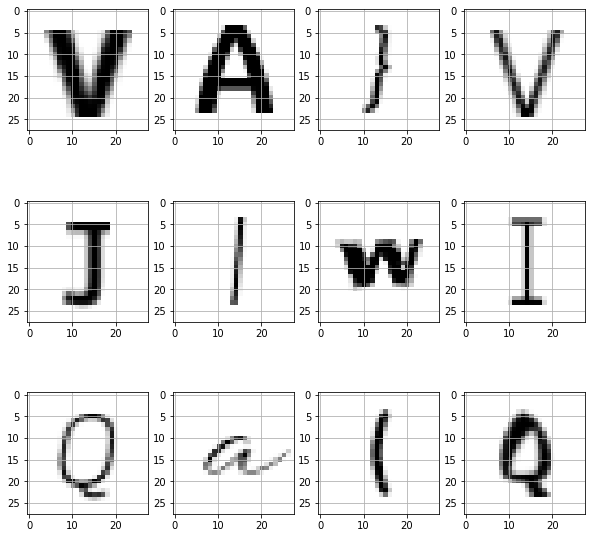

In [18]:
# displaying the charecters of our dataset
random = shuffle(X_train[:500]) #Randomly shuffle
fig,ax = plt.subplots(3,4 , figsize = (10,10)) 
axes = ax.flatten()
for i in range(12):
    img = np.reshape(random[i], (28,28)) # reshaping it for displaying
    axes[i].imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    axes[i].grid()



---



---

<h5 style="background-color:#FCF6D5"><b>IMPLEMENTING NEURAL NETWORKS</b></h5>

---



---







---
<h5 style="background-color:#D1EED3"><I><b>NEURAL NETWORKS</b>
</I> </h5>



---
> 1. Neural Networks (NN) are a type of machine learning model inspired by the structure and function of the human brain. They consist of interconnected nodes, called neurons, organized in layers, where each neuron is a computational unit that processes input data and passes the result to other neurons.

>2. The most common type of neural network is the feedforward neural network, where the data flows in one direction from the input layer through the hidden layers to the output layer. 

>3. Another type of neural network is the recurrent neural network (RNN), which allows the data to flow in loops, making it well suited for processing sequential data, such as time-series or natural language data. 

>4. There are also several other types of neural networks, such as convolutional neural networks (CNNs) and generative adversarial networks (GANs), that are specialized for specific tasks, such as image recognition and generative modeling, respectively.

>5. Neural networks have shown remarkable success in various applications, including computer vision, natural language processing, speech recognition, and many others. They have become an important tool in the field of machine learning, and their capabilities are continuously expanding with the development of new architectures and techniques.











---

<h5 style="background-color:#FCF6D5"><b>CONVOLUTION NEURAL NETWORKS (CNN)</b></h5>


---

> 1. CNN stands for Convolutional Neural Network, which is a type of neural network commonly used in computer vision tasks, such as image and video recognition, segmentation, and detection.


>2. CNNs typically consist of multiple layers, each with a specific function. The input layer receives the raw data, such as an image, and the subsequent layers apply a series of transformations to it. These layers include convolutional layers, pooling layers, and fully connected layers.

>3. In the convolutional layer, a set of filters slides over the image to extract features, and the output of each filter is called a feature map. In the pooling layer, the size of the feature maps is reduced by selecting the most important features. Finally, the fully connected layer takes the flattened feature maps and applies a traditional neural network on top of it to classify the input image.

>4. CNNs are typically trained using supervised learning with labeled data. The goal is to optimize the network's parameters, such as the weights and biases, to minimize the difference between the predicted output and the true output. This process is done using an optimizer and a loss function, which measures the difference between the predicted output and the true output.



---
<h5 style="background-color:#FCF6D5"><b>CNN ARCHITECTURE</b></h5>


---




![](https://miro.medium.com/max/1200/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg)

>1. **Input Layer:** This layer takes in the raw image data and passes it on to the next layer.

>2. **Convolutional Layer:** This layer applies a set of filters (small matrices) to the input image in order to extract features from it. Each filter produces a feature map, which highlights different aspects of the image.

>3. **Activation Layer:** This layer applies an activation function (such as ReLU) to each element of the feature maps in order to introduce nonlinearity into the network.

>4. **Pooling Layer:** This layer reduces the spatial dimensionality of the feature maps by performing down-sampling, which helps to reduce the number of parameters in the network and improve its robustness to translation.

>5. **Fully-Connected Layer:** This layer connects every neuron in the previous layer to every neuron in the next layer, just like in a traditional neural network. This layer is responsible for performing the final classification decision.

>6. **Output Layer:** This layer produces the final output of the network, which is typically a probability distribution over the different classes.



---

<h5 style="background-color:#D1EED3"><I><b>IMPORTING LIBRARIES FOR NEURAL NETWORK</b>
</I> </h5>

---



In [19]:
# importing libraries for building neural network
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping



---

---
<h5 style="background-color:#FCF6D5"><b>PRE-PROCESSING THE INPUT FOR CNN</b></h5>


---

---





In [20]:
RGB = 1  # In this case only one instead of 3 because we dont have Color images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2], RGB)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],RGB)

#normalizing the image data
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (219274, 28, 28, 1),(54819, 28, 28, 1)




---


<h5 style="background-color:#D1EED3"><I><b>Modeling CNN Architecture</b>
</I> </h5>

---



---

<h5 style="background-color:#FDE2E7"><b>Notes</b></h5>

---
>1. `epoch` :In machine learning, an epoch is a complete pass through the entire training dataset during the training process. In other words, it is one iteration over the entire dataset, where the model updates its weights based on the loss calculated on the training set.

> 2. `params`: This refers to the number of learnable parameters (weights and biases) in the network. The number of parameters in a CNN can be used as an indicator of its complexity and capacity to learn.

In [21]:
model = Sequential ()

# 4 Conv with Maxpool and Dropout [25%] -> Flatten - >  Dense -> Dense -> output 
model.add(Conv2D(filters = 32 , kernel_size = (3,3),input_shape = (Length, Height, RGB), padding = 'same',))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256 , kernel_size = (3,3) ,padding = 'same'))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(350))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(NCl, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        2

---



<h5 style="background-color:#FDE2E7"><I><b>Explanation:</b>
</I> </h5>


---

Basic steps while modeling CNN are as below:

1. Batch normalization: It is a technique used to normalize the input of each layer, which helps in reducing the internal covariate shift problem. This technique is used to speed up the training of a neural network, as it reduces the number of epochs required to reach convergence.

2. Activation: It is a function used to introduce non-linearity in the output of a neuron. In CNN, the Rectified Linear Unit (ReLU) activation function is commonly used, as it is computationally efficient and allows the model to learn complex features.

3. Max pooling: Max pooling is a technique used in a type of machine learning algorithm called a convolutional neural network (CNN). It is used to make the neural network more efficient by reducing the amount of information it needs to process.

4. Dropout: It is a regularization technique used to prevent overfitting in a neural network. It randomly drops out a fraction of the neurons during training, which reduces the dependence of the network on any one neuron and encourages it to learn more robust features. This technique helps to reduce the variance of the model, which in turn improves its generalization performance.

---
> `model = Sequential()` : This creates a new Sequential model object.

>`model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(Length, Height, RGB), padding='same'))
`:This adds the first convolutional layer to the model with 32 filters, a 3x3 kernel size, and an input shape of (Length, Height, RGB).

> `model.add(BatchNormalization())`: This adds a batch normalization layer to the model.

> `model.add(tf.keras.layers.Activation('relu'))`:This adds a ReLU activation layer to the model.

>`model.add(MaxPool2D(pool_size=(2,2)))`: model.add(MaxPool2D(pool_size=(2,2)))

> `model.add(Dropout(0.25))` : This adds a dropout layer to the model with a rate of 25%.

---

In [22]:
#defining parameters for training
optimizer  = Adam(learning_rate=0.01)
callback =EarlyStopping(monitor='loss', patience=5)
Batch_ = 64
Epochs_ = 100

model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])


---

<h5 style="background-color:#FDE2E7"><I><b>Explanation:</b>
</I> </h5>

---



> `optimizer  = Adam(learning_rate=0.01)` : an optimizer is defined using the Adam algorithm with a learning rate of 0.01. The optimizer is responsible for updating the weights and biases of the model during training in order to minimize the loss function.

> `callback =EarlyStopping(monitor='loss', patience=5)`:  EarlyStopping callback is defined. This callback monitors the loss function during training and stops training early if the loss has not improved for a certain number of epochs (in this case, 5).

> `Batch_` variable is set to 64, which means that during training, the model will process 64 samples at a time before updating the weights and biases.

> `Epochs_` variable is set to 100, which means that the model will be trained for 100 epochs (passes through the training data).

>`model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])` : the model is compiled using categorical cross-entropy as the loss function, the previously defined optimizer, and accuracy as the metric to monitor during training. Compiling the model prepares it for training by setting up the necessary computations and data structures.



---



---

<h5 style="background-color:#FCF6D5"><b>MODEL TRAINING</b></h5>

---



---



In [23]:
#Training
history= model.fit(X_train,y_train, validation_data = (X_test,y_test),batch_size = Batch_ ,
                   epochs = Epochs_, verbose = 1)

Epoch 1/100
3427/3427 [==============================] - 29s 6ms/step - loss: 0.6367 - accuracy: 0.8123 - val_loss: 0.2885 - val_accuracy: 0.9140
Epoch 2/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.3985 - accuracy: 0.8780 - val_loss: 0.2649 - val_accuracy: 0.9198
Epoch 3/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.3591 - accuracy: 0.8890 - val_loss: 0.2542 - val_accuracy: 0.9196
Epoch 4/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.3361 - accuracy: 0.8955 - val_loss: 0.2317 - val_accuracy: 0.9275
Epoch 5/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.3205 - accuracy: 0.9003 - val_loss: 0.2362 - val_accuracy: 0.9278
Epoch 6/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.3085 - accuracy: 0.9039 - val_loss: 0.2226 - val_accuracy: 0.9267
Epoch 7/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.3020 - accuracy: 0.9058 - val_loss: 0.2228 -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3427/3427 [==============================] - 21s 6ms/step - loss: 0.2285 - accuracy: 0.9262 - val_loss: 0.1858 - val_accuracy: 0.9384
Epoch 69/100
3427/3427 [==============================] - 23s 7ms/step - loss: 0.2274 - accuracy: 0.9274 - val_loss: 0.1760 - val_accuracy: 0.9432
Epoch 70/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.2268 - accuracy: 0.9265 - val_loss: 0.1731 - val_accuracy: 0.9433
Epoch 71/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.2267 - accuracy: 0.9268 - val_loss: 0.1836 - val_accuracy: 0.9422
Epoch 72/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.2251 - accuracy: 0.9270 - val_loss: 0.1849 - val_accuracy: 0.9401
Epoch 73/100
3427/3427 [==============================] - 20s 6ms/step - loss: 0.2265 - accuracy: 0.9269 - val_loss: 0.1809 - val_accuracy: 0.9411
Epoch 74/100
3427/3427 [==============================] - 21s 6ms/step - loss: 0.2254 - accuracy: 0.9274 - val_loss: 0.1911 - val_a



---



---

<h5 style="background-color:#FCF6D5"><b>MODEL EVALUATION</b></h5>

---



---



In [27]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test,y_test, batch_size = Batch_,verbose = 0)
print(f"Test Accuracy:{round(score[1],4)*100}%")


Test Accuracy:94.28%




---



---

<h5 style="background-color:#FCF6D5"><b>MODEL PERFORMANCE: VISUALIZATION</b></h5>

---



---



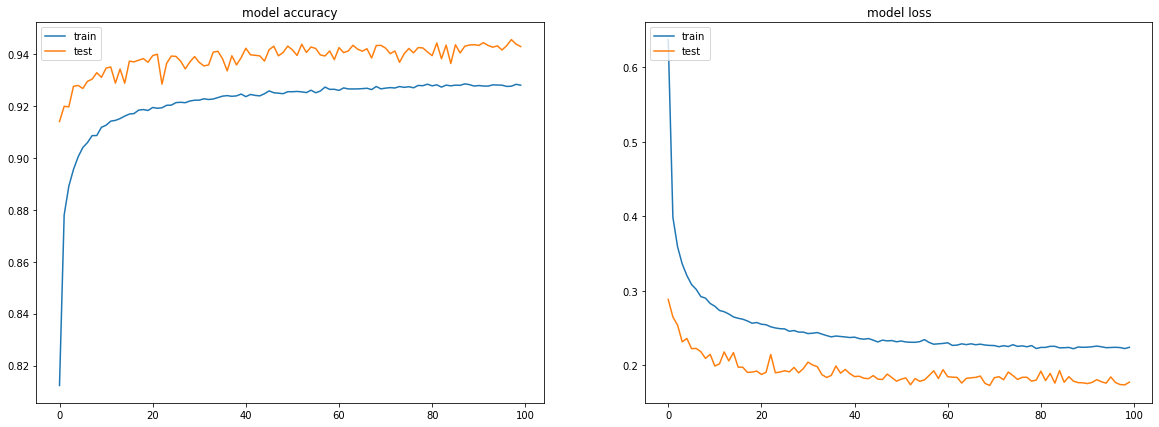

In [29]:
Plott(history)

---

<h5 style="background-color:#FDE2E7"><I><b>Explanation:</b>
</I> </h5>

---
> 1. It can be observed that the accuracy of the model for both the training and test datasets exhibits a similar trend, although the test data demonstrates slightly more fluctuations than the training dataset. 

> 2. Furthermore, the model loss for both the training and test datasets shows a comparable decreasing trend.



---



---

<h5 style="background-color:#FCF6D5"><b>FINAL PREDICTIONS OBTAINED FROM TRAINING MODEL</b></h5>

---



---



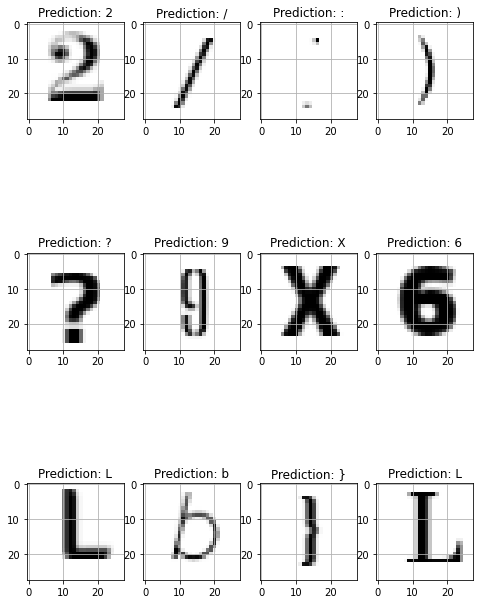

In [30]:
#predicting the characters using trained model
fig, axes = plt.subplots(3,4, figsize=(8,12))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28)) # reshaping it for displaying
    ax.imshow(img, cmap="Greys")
    img_final =np.reshape(img, (1,28,28,1)) # reshapng it for passing into model for prediction
    pred = label_dict_inv[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: "+pred)
    ax.grid()



---



---

<h5 style="background-color:#FCF6D5"><b>CONCLUSION</b></h5>

---



---


1. The model performed good and was able to predict with 100% accuracy (12 out of 12 predictions are correct)<br>
2. The accuracy on test test is 93.96% which is pretty decent for a simple CNN
